In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense,Reshape
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
import tensorflow as tf
from pathlib import Path
import cv2
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from keras.applications import densenet

from keras.models import Sequential, Model, load_model
from keras.preprocessing import image
import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report
tf.set_random_seed(1234)

Using TensorFlow backend.


In [2]:
from google.colab import drive

drive.mount('/content/gdrive')
#os.listdir('../input')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
#image size reduced to 64*64 and upsampled train data
train_gen=ImageDataGenerator(rotation_range=90,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             rescale = 1./255, 
                             shear_range = 0.2,
                             zoom_range = 0.5,
                             horizontal_flip = True,
                             #featurewise_std_normalization=True,
                             fill_mode="nearest")

train = train_gen.flow_from_directory("/content/gdrive/My Drive/breast_cancer/fold1/train_mix_Norm/",
                                            class_mode="categorical",
                                            target_size=(64, 64),
                                            color_mode="rgb",
                                            shuffle=True,
                                            batch_size=32)

Found 8222 images belonging to 2 classes.


In [4]:
valid_gen=ImageDataGenerator(rotation_range=90,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             rescale = 1./255, 
                             shear_range = 0.2,
                             zoom_range = 0.5,
                             horizontal_flip = True,
                             #featurewise_std_normalization=True,
                             fill_mode="nearest")

valid = valid_gen.flow_from_directory("/content/gdrive/My Drive/breast_cancer/fold1/valid_mix_norm/",
                                            class_mode="categorical",
                                            target_size=(64, 64),
                                            color_mode="rgb",
                                            shuffle=True,
                                            batch_size=32)

Found 750 images belonging to 2 classes.


In [5]:
'''base_model = densenet.DenseNet121(input_shape=(128, 128, 3),
                                     weights='/content/gdrive/My Drive/densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                     include_top=False,
                                     pooling='avg')'''

base_model = densenet.DenseNet121(input_shape=(64, 64, 3),
                                     weights='imagenet',
                                     include_top=False,
                                     pooling='avg')

for layer in base_model.layers:
    layer.trainable = True

x = base_model.output
   
#predictions = Dense(2, activation='sigmoid')(x)
predictions = Dense(2, activation='softmax')(x)















29089792/29084464 [==============================] - 1s 0us/step


In [0]:
model = Sequential()
#model.add(densenet)
#model.add(layers.GlobalAveragePooling2D())
#model.add(layers.Dense(14, activation='softmax'))
model = Model(inputs=base_model.input, outputs=predictions)

In [8]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 32, 32, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1/conv[0][0]                 
____________________________________________________________________________________________

In [9]:
len(train)

257

In [10]:
len(valid)

24

In [11]:
optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc', 'mse'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
model_history = model.fit_generator(
    train,
    epochs=5,
    steps_per_epoch=257,
    validation_data=valid,
    validation_steps=24)



Epoch 1/5
257/257 [==============================] - 3948s 15s/step - loss: 0.5062 - acc: 0.8116 - mean_squared_error: 0.1398 - val_loss: 3.3902 - val_acc: 0.6053 - val_mean_squared_error: 0.3359
Epoch 2/5
257/257 [==============================] - 2543s 10s/step - loss: 0.3847 - acc: 0.8543 - mean_squared_error: 0.1108 - val_loss: 0.7360 - val_acc: 0.6520 - val_mean_squared_error: 0.2458
Epoch 3/5
257/257 [==============================] - 2479s 10s/step - loss: 0.3475 - acc: 0.8690 - mean_squared_error: 0.0972 - val_loss: 0.5770 - val_acc: 0.7653 - val_mean_squared_error: 0.1756
Epoch 4/5
257/257 [==============================] - 2483s 10s/step - loss: 0.3655 - acc: 0.8679 - mean_squared_error: 0.0996 - val_loss: 4.9115 - val_acc: 0.3800 - val_mean_squared_error: 0.5730
Epoch 5/5
257/257 [==============================] - 2542s 10s/step - loss: 0.4563 - acc: 0.8449 - mean_squared_error: 0.1172 - val_loss: 0.4952 - val_acc: 0.7733 - val_mean_squared_error: 0.1657


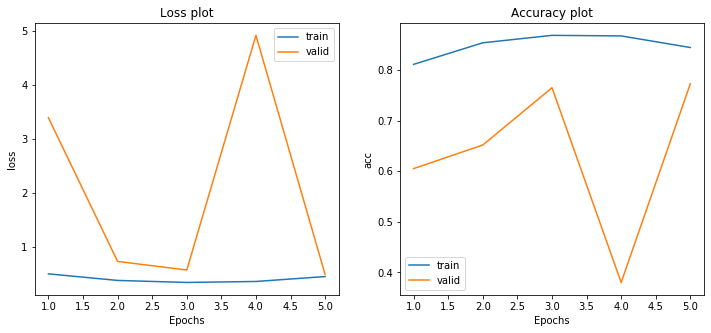

In [13]:
# plot the model loss and accuracy
train_loss = model_history.history['loss']
train_acc = model_history.history['acc']

valid_loss = model_history.history['val_loss']
valid_acc = model_history.history['val_acc']

x = [(i+1) for i in range(len(train_loss))]

f,ax = plt.subplots(1,2, figsize=(12,5))
ax[0].plot(x, train_loss)
ax[0].plot(x, valid_loss)
ax[0].set_title("Loss plot")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("loss")
ax[0].legend(['train', 'valid'])


ax[1].plot(x, train_acc)
ax[1].plot(x, valid_acc)
ax[1].set_title("Accuracy plot")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("acc")
ax[1].legend(['train', 'valid'])

plt.show()

In [14]:
test_gen=ImageDataGenerator(rotation_range=90,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             rescale = 1./255, 
                             shear_range = 0.2,
                             zoom_range = 0.5,
                             horizontal_flip = True,
                             #featurewise_std_normalization=True,
                             fill_mode="nearest")

test = test_gen.flow_from_directory("/content/gdrive/My Drive/breast_cancer/fold1/test/40X_Norm/",
                                            class_mode="categorical",
                                            target_size=(64, 64),
                                            color_mode="rgb",
                                            shuffle=True,
                                            batch_size=32)

Found 160 images belonging to 2 classes.


In [15]:
test_acc = model.evaluate_generator(
    test,
    steps=len(test),
    verbose=1
)

print(test_acc)

5/5 [==============================] - 61s 12s/step
[0.840661209821701, 0.7625, 0.20660145580768585]


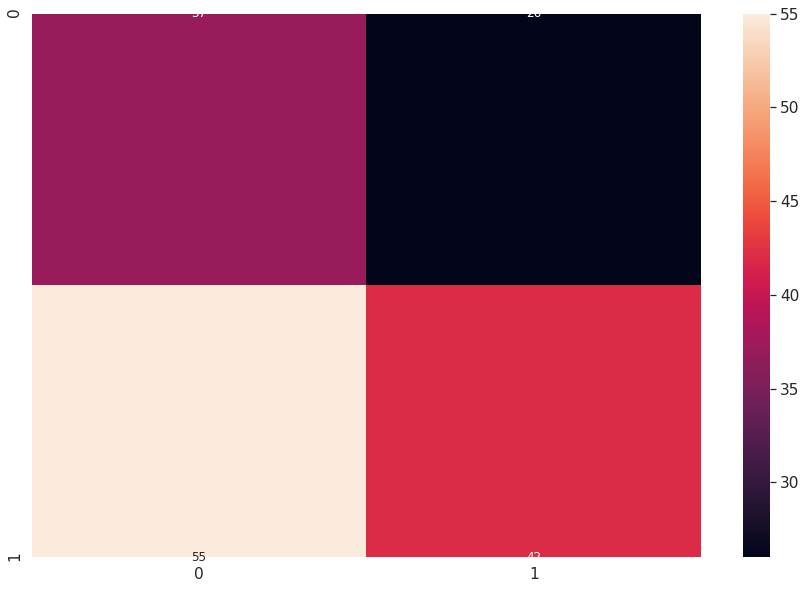

array([[37, 26],
       [55, 42]])

In [16]:
pred = model.predict_generator(test, steps=len(test))
predicted = np.argmax(pred, axis=1)


cm = confusion_matrix(test.classes, predicted)
plt.figure(figsize = (15,10))
sn.set(font_scale=1.4) #for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 12}) # font size
plt.show()
print()
cm

In [0]:
predicted

In [17]:
test_gen=ImageDataGenerator(rotation_range=90,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             rescale = 1./255, 
                             shear_range = 0.2,
                             zoom_range = 0.5,
                             horizontal_flip = True,
                             #featurewise_std_normalization=True,
                             fill_mode="nearest")

test = test_gen.flow_from_directory("/content/gdrive/My Drive/breast_cancer/fold1/test/100X_Norm/",
                                            class_mode="categorical",
                                            target_size=(64, 64),
                                            color_mode="rgb",
                                            shuffle=True,
                                            batch_size=32)

Found 209 images belonging to 2 classes.


In [18]:
test_acc = model.evaluate_generator(
    test,
    steps=len(test),
    verbose=1
)

print(test_acc)

7/7 [==============================] - 70s 10s/step
[0.3484726444100649, 0.8708133971291866, 0.10491516309206565]


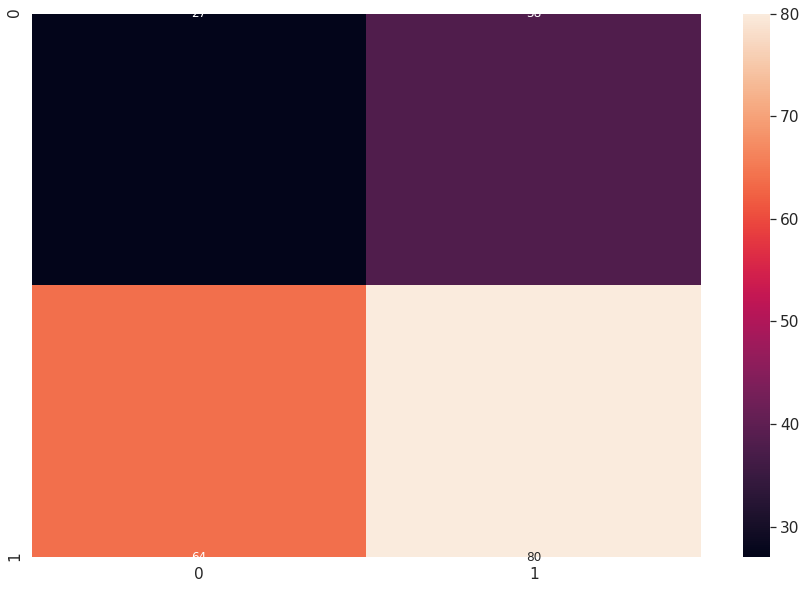

array([[27, 38],
       [64, 80]])

In [19]:
pred = model.predict_generator(test, steps=len(test))
predicted = np.argmax(pred, axis=1)


cm = confusion_matrix(test.classes, predicted)
plt.figure(figsize = (15,10))
sn.set(font_scale=1.4) #for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 12}) # font size
plt.show()
print()
cm

In [20]:
test_gen=ImageDataGenerator(rotation_range=90,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             rescale = 1./255, 
                             shear_range = 0.2,
                             zoom_range = 0.5,
                             horizontal_flip = True,
                             #featurewise_std_normalization=True,
                             fill_mode="nearest")

test = test_gen.flow_from_directory("/content/gdrive/My Drive/breast_cancer/fold1/test/200X_Norm/",
                                            class_mode="categorical",
                                            target_size=(64, 64),
                                            color_mode="rgb",
                                            shuffle=True,
                                            batch_size=32)

Found 202 images belonging to 2 classes.


In [21]:
test_acc = model.evaluate_generator(
    test,
    steps=len(test),
    verbose=1
)

print(test_acc)

7/7 [==============================] - 92s 13s/step
[0.35100106614651067, 0.8613861374335714, 0.10600835608668846]


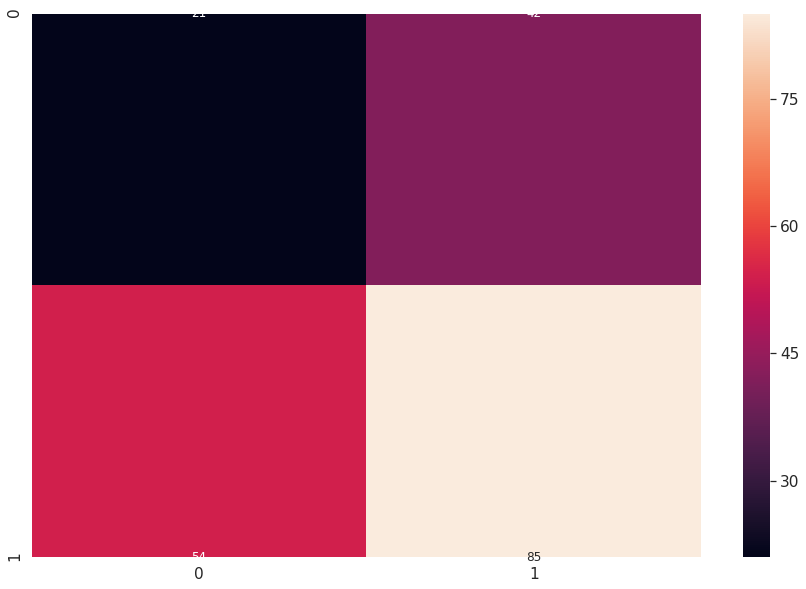

array([[21, 42],
       [54, 85]])

In [22]:
pred = model.predict_generator(test, steps=len(test))
predicted = np.argmax(pred, axis=1)


cm = confusion_matrix(test.classes, predicted)
plt.figure(figsize = (15,10))
sn.set(font_scale=1.4) #for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 12}) # font size
plt.show()
print()
cm

In [23]:
test_gen=ImageDataGenerator(rotation_range=90,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             rescale = 1./255, 
                             shear_range = 0.2,
                             zoom_range = 0.5,
                             horizontal_flip = True,
                             #featurewise_std_normalization=True,
                             fill_mode="nearest")

test = test_gen.flow_from_directory("/content/gdrive/My Drive/breast_cancer/fold1/test/400X_Norm/",
                                            class_mode="categorical",
                                            target_size=(64, 64),
                                            color_mode="rgb",
                                            shuffle=True,
                                            batch_size=32)

Found 183 images belonging to 2 classes.


In [24]:
test_acc = model.evaluate_generator(
    test,
    steps=len(test),
    verbose=1
)

print(test_acc)

6/6 [==============================] - 70s 12s/step
[0.5003924295713341, 0.8306010928961749, 0.14688490519473135]


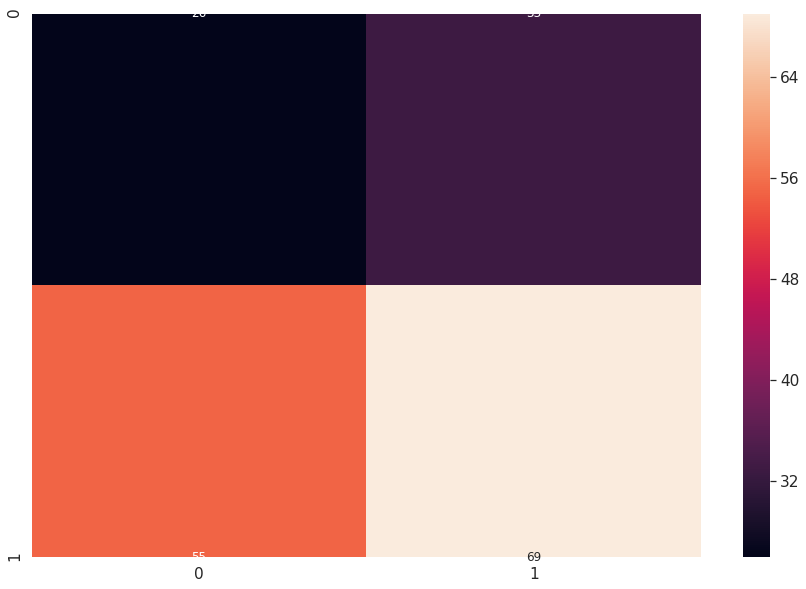

array([[26, 33],
       [55, 69]])

In [25]:
pred = model.predict_generator(test, steps=len(test))
predicted = np.argmax(pred, axis=1)


cm = confusion_matrix(test.classes, predicted)
plt.figure(figsize = (15,10))
sn.set(font_scale=1.4) #for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 12}) # font size
plt.show()
print()
cm

In [26]:
test_gen=ImageDataGenerator(rotation_range=90,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             rescale = 1./255, 
                             shear_range = 0.2,
                             zoom_range = 0.5,
                             horizontal_flip = True,
                             #featurewise_std_normalization=True,
                             fill_mode="nearest")

test = test_gen.flow_from_directory("/content/gdrive/My Drive/breast_cancer/fold1/test_mix_Norm/",
                                            class_mode="categorical",
                                            target_size=(64, 64),
                                            color_mode="rgb",
                                            shuffle=True,
                                            batch_size=32)

Found 754 images belonging to 2 classes.


In [27]:
test_acc = model.evaluate_generator(
    test,
    steps=len(test),
    verbose=1
)

print(test_acc)

24/24 [==============================] - 236s 10s/step
[0.686882000703078, 0.7625994690217137, 0.19983473728443013]


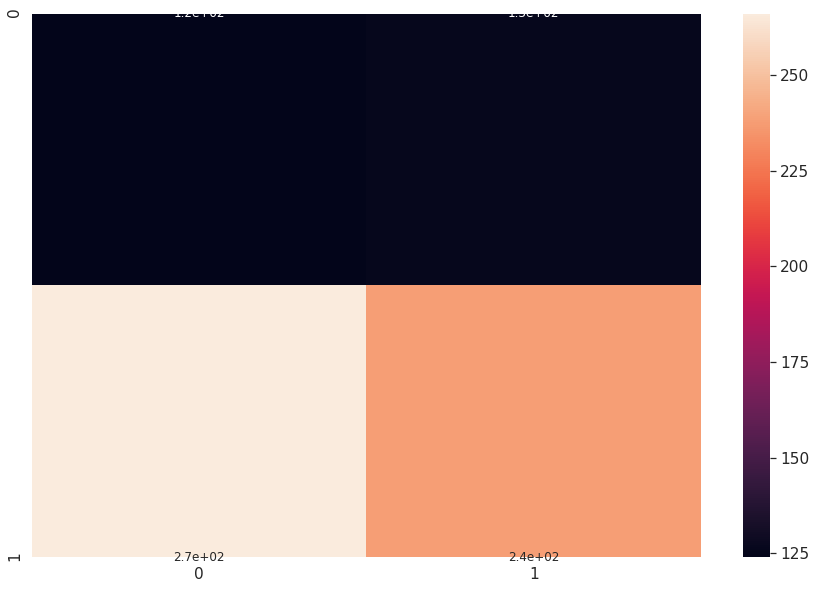

array([[124, 126],
       [266, 238]])

In [28]:
pred = model.predict_generator(test, steps=len(test))
predicted = np.argmax(pred, axis=1)


cm = confusion_matrix(test.classes, predicted)
plt.figure(figsize = (15,10))
sn.set(font_scale=1.4) #for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 12}) # font size
plt.show()
print()
cm